In [294]:
# Create Spark Session for Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [295]:
#Read CSV File via spark 
dt = spark.read.csv('ws2_data.csv', header = True, inferSchema = True, )

Data Profiling

In [296]:
# show data information 5 row
dt.show(5)

+-------------------+--------+-------+------------+-----+
|          timestamp| user_id|book_id|     country|price|
+-------------------+--------+-------+------------+-----+
|2021-05-01 08:03:44|824dc295|      2|      Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|    Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|       Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|      Canada| 28.0|
+-------------------+--------+-------+------------+-----+
only showing top 5 rows



In [297]:
#Check type of colum
dt.printSchema()

root
 |-- timestamp: timestamp (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- price: double (nullable = true)



In [298]:
# count row and column
print((dt.count(), len(dt.columns)))

(500000, 5)


In [299]:
#Statistics
dt.summary().show()

+-------+-----------+-----------------+-------+------------------+
|summary|    user_id|          book_id|country|             price|
+-------+-----------+-----------------+-------+------------------+
|  count|     499998|           500000| 500000|            500000|
|   mean|   Infinity|       740.377786|   null|31.459311679998564|
| stddev|        NaN|559.9366172146358|   null|10.945931459891698|
|    min|   00000f49|                1|Algeria|               0.0|
|    25%|2.4050123E7|              262|   null|             24.95|
|    50%|  7.04742E7|              614|   null|             29.99|
|    75%|   4.857E81|             1215|   null|             34.99|
|    max|   ffffe3e7|             2269|  Yemen|              84.0|
+-------+-----------+-----------------+-------+------------------+



In [300]:
#find data missing 
dt.summary("count").show()

+-------+-------+-------+-------+------+
|summary|user_id|book_id|country| price|
+-------+-------+-------+-------+------+
|  count| 499998| 500000| 500000|500000|
+-------+-------+-------+-------+------+



In [301]:
#user_id colum have missing data 
dt.where(dt.user_id.isNull()).show()

+-------------------+-------+-------+-------+-----+
|          timestamp|user_id|book_id|country|price|
+-------------------+-------+-------+-------+-----+
|2021-05-01 14:41:20|   null|    516| Brazil|27.37|
|2021-06-30 02:27:00|   null|   1390|  Japan|27.99|
+-------------------+-------+-------+-------+-----+



EDA - Exploratory Data Analysis

Non-Graphical EDA

In [302]:
dt.where(dt.country == 'Canada').show(5)

+-------------------+--------+-------+-------+-----+
|          timestamp| user_id|book_id|country|price|
+-------------------+--------+-------+-------+-----+
|2021-05-01 14:50:52|3553ebbb|     14| Canada| 28.0|
|2021-05-01 00:01:09|b07799e7|     20| Canada| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20| Canada| 28.0|
|2021-05-01 10:01:44|c52587cc|     20| Canada| 28.0|
|2021-05-01 23:49:22|bfdfeeaf|     25| Canada|29.99|
+-------------------+--------+-------+-------+-----+
only showing top 5 rows



In [303]:
#Total purchases made in April, how many rows?
dt.where(dt.timestamp.startswith("2021-04")).count()

0

Graphical EDA

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [305]:
#Convert Spark Dataframe to Pandas Dataframe 
dt_pd = dt.toPandas()

<Axes: xlabel='price'>

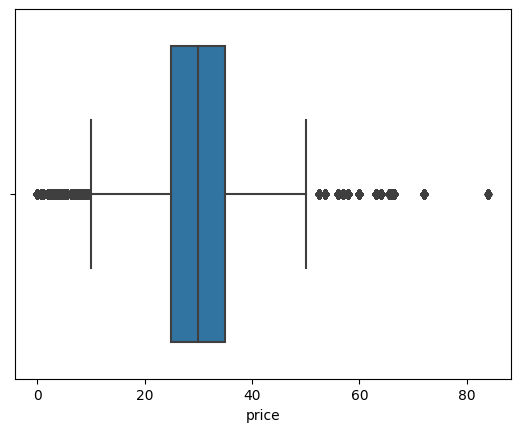

In [306]:
# Boxplot - Shows the distribution of numerical data.
sns.boxplot(x = dt_pd['price'])

<Axes: xlabel='price', ylabel='Count'>

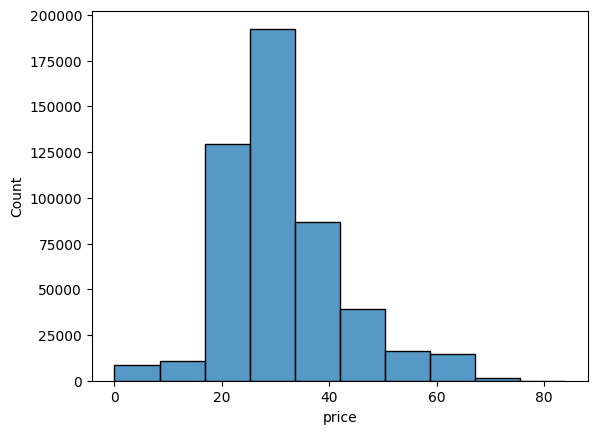

In [307]:
sns.histplot(dt_pd['price'], bins=10)

<Axes: xlabel='book_id', ylabel='price'>

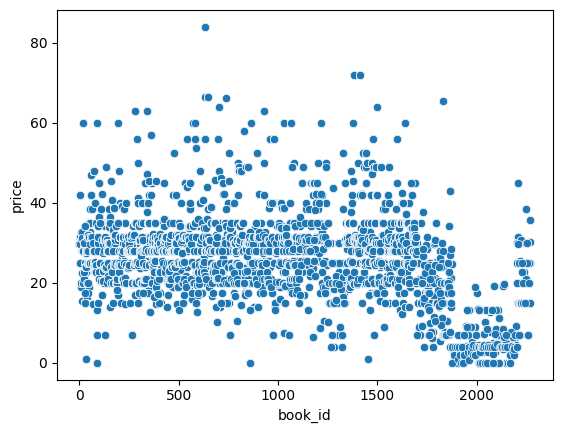

In [308]:
sns.scatterplot(dt_pd, x = 'book_id', y = 'price')

Data Cleansing with Spark

In [309]:
# Show top 5 rows
dt.show(5)

+-------------------+--------+-------+------------+-----+
|          timestamp| user_id|book_id|     country|price|
+-------------------+--------+-------+------------+-----+
|2021-05-01 08:03:44|824dc295|      2|      Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|    Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|       Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|      Canada| 28.0|
+-------------------+--------+-------+------------+-----+
only showing top 5 rows



In [310]:
# Show Schema
dt.printSchema()

root
 |-- timestamp: timestamp (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- price: double (nullable = true)



In [311]:
dt.select("timestamp").show(5)

+-------------------+
|          timestamp|
+-------------------+
|2021-05-01 08:03:44|
|2021-05-02 02:48:34|
|2021-05-01 16:54:57|
|2021-05-01 21:45:28|
|2021-05-01 14:50:52|
+-------------------+
only showing top 5 rows



Anomalies Check
1) Syntactical Anomalies

In [312]:
# Count Country and show Country
Number_country =dt.select("Country").distinct().count()
dt.select("Country").distinct().sort("Country").show( Number_country, False )

+------------------------+
|Country                 |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Japane                  |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|

In [313]:
dt.where(dt["country"] == "Japane").show()

+-------------------+--------+-------+-------+-----+
|          timestamp| user_id|book_id|country|price|
+-------------------+--------+-------+-------+-----+
|2021-05-01 13:11:11|a904217a|   1129| Japane|29.65|
|2021-05-02 10:27:42|a6052e97|   1466| Japane| 35.0|
|2021-05-04 10:44:41|a0f44c26|   1497| Japane|17.49|
|2021-05-04 05:40:46|ad0f9907|   2269| Japane|35.71|
|2021-05-05 01:08:25|aa169f5d|   1378| Japane|59.93|
|2021-05-04 17:42:32|a28e3c68|   1411| Japane|29.99|
|2021-05-05 16:29:39|a909212e|   1652| Japane|24.99|
|2021-05-06 23:10:29|a7b05d98|   1420| Japane|30.79|
|2021-05-07 22:18:42|a169255e|   1459| Japane|25.08|
|2021-05-08 06:06:15|ab2159d6|   1035| Japane|22.67|
|2021-05-09 02:46:06|a6cba2fc|   1928| Japane|  7.0|
|2021-05-09 12:12:35|a0e31842|   1358| Japane|34.99|
|2021-05-11 16:33:19|a2bc5460|   1616| Japane|29.65|
|2021-05-12 22:32:52|af75e4d1|   1603| Japane|18.89|
|2021-05-12 19:14:33|a0accb45|   1934| Japane| 1.95|
|2021-05-13 05:23:12|abfe1e79|   1368| Japane|

In [314]:
from pyspark.sql.functions import when
dt_clean = dt.withColumn("CountryUpdate", when(dt['Country'] == 'Japane', 'Japan').otherwise(dt['Country']))

In [315]:
dt_clean.select("CountryUpdate").distinct().sort("CountryUpdate").show(Number_country, False)

+------------------------+
|CountryUpdate           |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|Netherlands             |
|

In [316]:
dt_clean.show()

+-------------------+--------+-------+--------------------+-----+--------------------+
|          timestamp| user_id|book_id|             country|price|       CountryUpdate|
+-------------------+--------+-------+--------------------+-----+--------------------+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|              Israel|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|            Thailand|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|               Italy|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|        South Africa|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|              Canada|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|United States of ...|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|United States of ...|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|              Canada|
|2021-05-01 00:21:24|9d2e93c8|     20|     

In [317]:
dt_clean = dt_clean.drop("Country").withColumnRenamed('CountryUpdate', 'Country')

In [318]:
dt_clean.show(5)

+-------------------+--------+-------+-----+------------+
|          timestamp| user_id|book_id|price|     Country|
+-------------------+--------+-------+-----+------------+
|2021-05-01 08:03:44|824dc295|      2|24.95|      Israel|
|2021-05-02 02:48:34|f80fe106|      6|31.49|    Thailand|
|2021-05-01 16:54:57|01cb9fe0|      9|29.65|       Italy|
|2021-05-01 21:45:28|59508f47|     13| 22.4|South Africa|
|2021-05-01 14:50:52|3553ebbb|     14| 28.0|      Canada|
+-------------------+--------+-------+-----+------------+
only showing top 5 rows



Semantic Anomalies

In [319]:
dt_clean.select("user_id").show(10)

+--------+
| user_id|
+--------+
|824dc295|
|f80fe106|
|01cb9fe0|
|59508f47|
|3553ebbb|
|ea28260a|
|ff44767e|
|b07799e7|
|9d2e93c8|
|612db483|
+--------+
only showing top 10 rows



In [320]:
dt_clean.select("user_id").count()

500000

In [321]:
# find data that right format 
dt_clean.where(dt_clean["user_id"].rlike("^[a-z0-9]{8}$")).count()

499996

In [322]:
#Incorrect data = All data - Right data 
dt_correct_userid = dt_clean.filter(dt_clean["user_id"].rlike("^[a-z0-9]{8}$"))
dt_incorrect_userid = dt_clean.subtract(dt_correct_userid)

dt_incorrect_userid.show(10)

+-------------------+----------+-------+-----+--------------------+
|          timestamp|   user_id|book_id|price|             Country|
+-------------------+----------+-------+-----+--------------------+
|2021-06-19 16:00:22|ca86d17200|   2269|35.71|United States of ...|
|2021-05-01 14:41:20|      null|    516|27.37|              Brazil|
|2021-07-15 18:53:09|ca86d17200|    322|30.79|United States of ...|
|2021-06-30 02:27:00|      null|   1390|27.99|               Japan|
+-------------------+----------+-------+-----+--------------------+



In [323]:
#Replace incorrect data 
dt_clean_User_id = dt_clean.withColumn("UserID_Update", when(dt_clean['user_id'] == 'ca86d17200', 'ca86d172').otherwise(dt_clean['user_id']))

In [324]:
#Check
#Incorrect data = All data - Right data 
dt_correct_userid = dt_clean_User_id.filter(dt_clean_User_id["UserID_Update"].rlike("^[a-z0-9]{8}$"))
dt_incorrect_userid = dt_clean_User_id.subtract(dt_correct_userid)

dt_incorrect_userid.show(10)

+-------------------+-------+-------+-----+-------+-------------+
|          timestamp|user_id|book_id|price|Country|UserID_Update|
+-------------------+-------+-------+-----+-------+-------------+
|2021-06-30 02:27:00|   null|   1390|27.99|  Japan|         null|
|2021-05-01 14:41:20|   null|    516|27.37| Brazil|         null|
+-------------------+-------+-------+-----+-------+-------------+



In [325]:
dt_clean = dt_clean_User_id.drop("user_id").withColumnRenamed("UserID_Update", "user_id")


In [326]:
#Confirm
#Incorrect data = All data - Right data 
dt_correct_userid = dt_clean.filter(dt_clean["user_id"].rlike("^[a-z0-9]{8}$"))
dt_incorrect_userid = dt_clean.subtract(dt_correct_userid)

dt_incorrect_userid.show(10)

+-------------------+-------+-----+-------+-------+
|          timestamp|book_id|price|Country|user_id|
+-------------------+-------+-----+-------+-------+
|2021-06-30 02:27:00|   1390|27.99|  Japan|   null|
|2021-05-01 14:41:20|    516|27.37| Brazil|   null|
+-------------------+-------+-----+-------+-------+



Missing values

In [327]:
dt_clean.summary("count").show()

+-------+-------+------+-------+-------+
|summary|book_id| price|Country|user_id|
+-------+-------+------+-------+-------+
|  count| 500000|500000| 500000| 499998|
+-------+-------+------+-------+-------+



In [328]:
# Use List Comparehension find null 
from pyspark.sql.functions import col, sum

dt_nulllist = dt_clean.select([ sum(col(colname).isNull().cast("int")).alias(colname) for colname in dt_clean.columns ])
dt_nulllist.show()

+---------+-------+-----+-------+-------+
|timestamp|book_id|price|Country|user_id|
+---------+-------+-----+-------+-------+
|        0|      0|    0|      0|      2|
+---------+-------+-----+-------+-------+



In [329]:
#user_id colum have null values

dt_clean.where(dt_clean['user_id'].isNull()).show(10) 

+-------------------+-------+-----+-------+-------+
|          timestamp|book_id|price|Country|user_id|
+-------------------+-------+-----+-------+-------+
|2021-05-01 14:41:20|    516|27.37| Brazil|   null|
|2021-06-30 02:27:00|   1390|27.99|  Japan|   null|
+-------------------+-------+-----+-------+-------+



In [337]:
#The Data Analyst team says they want us to replace the NULL user_id with 00000000.
dt_clean_user_id_update = dt_clean.withColumn("UserID_null", when(dt_clean['user_id'].isNull(), '00000000').otherwise(dt_clean['user_id']))

In [338]:
dt_clean = dt_clean_user_id_update.drop("user_id").withColumnRenamed("UserID_null", "user_id")

In [339]:
dt_clean.where(dt_clean['user_id'].isNull()).show(10) 

+---------+-------+-----+-------+-------+
|timestamp|book_id|price|Country|user_id|
+---------+-------+-----+-------+-------+
+---------+-------+-----+-------+-------+



Outliers:

In [340]:
#Convert to panda 
dt_clean_pd = dt_clean.toPandas()

<Axes: xlabel='price'>

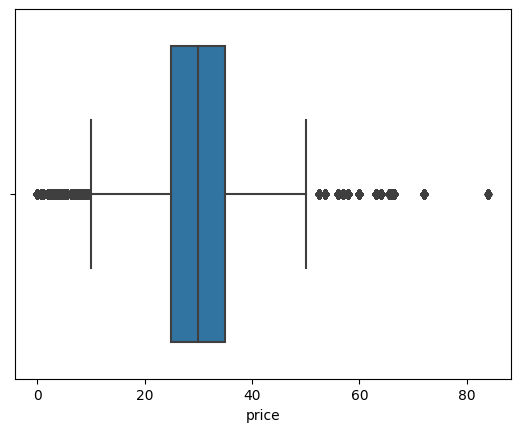

In [341]:
#Plot graph 
sns.boxplot(x = dt_clean_pd['price'])

In [345]:
#Found 1 Data is price is over 80 usd
dt_clean.where(dt_clean["price"] > 80 ).select('book_id').distinct().show()

+-------+
|book_id|
+-------+
|    635|
+-------+



Found that Book_ID = 635 is a book named "The Power Broker".

The Power Broker actually costs $84 and is a 66-hour audio book.

Here, it is considered an outlier, but it is not misinformation. Therefore, there is no need to solve anything.